## Problem Statement

You are a data scientist at a retail consulting firm. You have been provided with a dataset named **"retail_store_sales_data.csv"**, which includes detailed records of daily sales for a retail store over a two-year period. The dataset comprises the following columns:

- **date:** The specific date for each sales record.
- **day_of_week:** The day of the week corresponding to each date.
- **sales_amount (usd):** : The total sales amount in USD recorded on each day.

### Task1: Data Import

1. Import the data from the "retail_store_sales_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("retail_store_sales_data.csv")
df.head()

,date,day_of_week,sales_amount (usd)
0,01-01-2020,Wednesday,1212
1,02-01-2020,Thursday,1261
2,03-01-2020,Friday,596
3,04-01-2020,Saturday,696
4,05-01-2020,Sunday,1434


In [4]:
df.columns

Index(['date', 'day_of_week', 'sales_amount (usd)'], dtype='object')

### Task2: Histogram Plot of Sales Amounts

- Create the histogram plot for the 'sales_amount (usd)' column

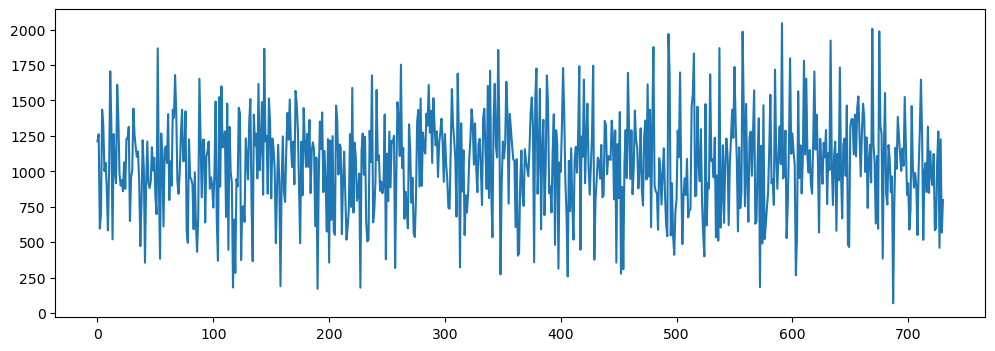

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df['sales_amount (usd)'])

<Axes: xlabel='sales_amount (usd)', ylabel='Count'>

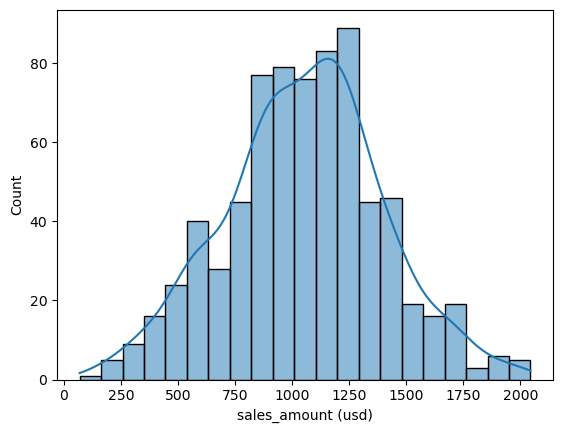

In [5]:
sns.histplot(df['sales_amount (usd)'], kde=True)

### Task 3: Computing Population Standard Deviation

- **Determine Standard Deviation:** Calculate the population standard deviation for the 'Sales_Amount (usd)' column. This is helpful in the accurate creation of confidence intervals in subsequent analyses.

In [7]:
std_population = df['sales_amount (usd)'].std()
std_population

344.80896600101187

### Task4: Create Sample Data

- Create a sample dataset consisting of 100 data points from the 'Sales_Amount (usd)' column.
- Calculate the mean for this sample. 


In [10]:
sample_size = 100
sample=df.sample(sample_size,random_state=100)
sample

,date,day_of_week,sales_amount (usd)
184,03-07-2020,Friday,846
535,19-06-2021,Saturday,970
299,26-10-2020,Monday,925
221,09-08-2020,Sunday,709
152,01-06-2020,Monday,1163
...,...,...,...
621,13-09-2021,Monday,1399
490,05-05-2021,Wednesday,835
25,26-01-2020,Sunday,1230
125,05-05-2020,Tuesday,745


In [11]:
mean_sample = sample['sales_amount (usd)'].mean()
mean_sample

987.67

### Task 5: Estimating Population Mean at Various Confidence Levels

Confidence Interval Calculations: Using the sample data, estimate the population mean for 'Sales_Amount (usd)' at different confidence levels. Specifically, calculate the confidence intervals for the population mean at the following levels:

    - 60% Confidence Level
    - 82% Confidence Level
    - 98% Confidence Level

- 60% means center 60 and balance=40  left half 20 so all equal to 80
- 82% means center 82 and balance=18  left half 9 so all equal to 91 
- 98% means center 98 and balance=2  left half 1 so all equal to 99

### 60% confidence level

In [23]:
import scipy.stats as st
z_score_60 = st.norm.ppf(0.80)
z_score_60

0.8416212335729143

In [24]:
margin_of_error60 = z_score_60*(std_population/np.sqrt(sample_size))
upper_60 = mean_sample + margin_of_error60
lower_60 = mean_sample - margin_of_error60
upper_60,lower_60

(1016.6898547312773, 958.6501452687227)

### 82% confidence level

In [16]:
import scipy.stats as st
z_score_82 = st.norm.ppf(0.91)

margin_of_error82 = z_score_82*(std_population/np.sqrt(sample_size))
upper_82 = mean_sample + margin_of_error82
lower_82 = mean_sample - margin_of_error82
upper_82,lower_82

(1033.9004356827375, 941.4395643172625)

### 98% confidence level

In [19]:
import scipy.stats as st
z_score_98 = st.norm.ppf(0.99)

margin_of_error98 = z_score_98*(std_population/np.sqrt(sample_size))
upper_98 = mean_sample + margin_of_error98
lower_98 = mean_sample - margin_of_error98
upper_98,lower_98

(1067.8845605006675, 907.4554394993324)